# **CRIMENES EN LOS ANGELES**

**Contexto Empresarial**

Se analizarán los datos de crímenes en la ciudad de Los Ángeles desde el año 2020 hasta el presente. Este dataset es proporcionado por la ciudad de Los Ángeles y contiene información detallada sobre cada incidente criminal reportado, incluyendo la fecha, hora, ubicación, tipo de crimen, edad, sexo y descendencia de las víctimas. Las autoridades municipales, los departamentos de policía, las organizaciones de seguridad pública, los investigadores y los responsables de la formulación de políticas utilizan este tipo de datos para mejorar la seguridad y reducir la criminalidad.

Se analizarán los distintos aspectos en cuanto a la actividad criminal, teniendo en cuenta cual género es el que mas se ve reflejados, los tipos de delitos cometidos segun la zona, el sexo, el genero, condiciones sociales, entre otros.

**Problema Comercial**

El problema comercial central que abordaremos es el aumento de la criminalidad segun el tipo de gente y los tipos de crimenes en Los Ángeles. Los encargados de la seguridad y las autoridades municipales necesitan comprender mejor los patrones y tendencias de los crímenes para poder asignar recursos policiales de manera más efectiva, planificar estrategias de prevención del crimen y tomar decisiones informadas que mejoren la seguridad pública.

**Objetivos del Proyecto**

El objetivo principal del proyecto es analizar los datos de criminalidad para identificar patrones y tendencias en los crímenes ocurridos en Los Ángeles. 

Este análisis ayudará a saber:

1) Si victimas más afectadas son del género femenino 
2) Crimenes según la desendencia su descendencia
3) Franja horaria que más se observan los crimenes
4) La edad más recurrente de las victimas
5) Cual es el tipo de crimen más recurrente?
6) Cuales son las armas que tienen más impacto en la actividad criminal?


**Contexto Analítico**

Se proporciona un archivo CSV (y uno modificado para efectuar el modelo de regresión) el cual contiene todos los datos criminalísticos en Los Ángeles - EEUU, desde el año 2020 hasta la actualidad.

Las tareas que debemos realizar comprenden la creación de representaciones gráficas de los datos, modelado de datos, efectuar un análisis exploratorio de los mismos y realizar análisis para detectar patrones. Al llevar a cabo el análisis exploratorio, podremos adquirir una mejor comprensión de la estructura y las relaciones entre las variables, lo cual será de gran utilidad para identificar patrones y comportamientos en los datos.








# **Fuente y Documentación**
**Documentacion de la Base de Datos:** https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8/about_data

**Fuente de la Base de Datos:** https://catalog.data.gov/dataset/crime-data-from-2020-to-present


# **Configuraciones y Carga de Datos**

**Importacion de Librerias**

In [70]:
#Impportamos librerias para el manejo de datos
import pandas as pd
import numpy as np

#Importamos librerias para la visualizacion de datos
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

#Importamos librerias para Analisis de Componentes Principales (PCA)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Importamos librerias para Algoritmos de Regresión
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

**Configuración de Librerias**

In [71]:
#Personalizamos Matplotlib
mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['axes.titlecolor'] = 'blue'#'firebrick'
mpl.rcParams['axes.labelcolor'] = 'blue'
mpl.rcParams['axes.labelsize'] = '10'
mpl.rcParams['axes.labelweight'] = 'light'
mpl.rcParams['axes.linewidth'] = '1'
mpl.rcParams['grid.color'] = 'black'
mpl.rcParams['grid.linestyle'] = '-.'
mpl.rcParams['grid.linewidth'] = '2'
plt.style.use('fast')

#Personalizamos Seanborn
sns.set_style(style="white")
sns.set_style(rc={"grid.linestyle": ":"})
sns.set_style(rc={"axes.titleweight": "normal"})
sns.set_style(rc={"axes.titlecolor": "blue"})
sns.set_style(rc={"axes.labelcolor": "blue"})
sns.set_style(rc={"axes.labelsize": "12"})
sns.set_style(rc={"axes.labelweight": "normal"})
sns.set_style(rc={"axes.linewidth": "0.5"})
sns.set_style(rc={"grid.color": "purple"})
sns.set_style(rc={"grid.linestyle": "--"})
sns.set_style(rc={"grid.linewidth": "0.5"})
sns.set_style(rc={"font.fantasy": "Comic Sans MS"})
sns.set_style(rc={"font.serif": "Utopia"})

**CARGA DE DATOS**

**Con Google Drive & GoogleColab**

In [72]:
#Establecemos una ruta de acceso al drive
#from google.colab import drive
#import os

#Movemos al directorio del drive
#os.chdir("/content/drive/MyDrive/PROYECTO DATASCIENCE 1 - CODERHOUSE - Facundo Riccio")



In [73]:
#Cargamos el DataFrame
#%cd '/content/drive/MyDrive/PROYECTO DATASCIENCE 1 - CODERHOUSE - Facundo Riccio'
#crimenes = pd.read_csv("Crime_Data_from_2020_to_Present.csv", delimiter=",")

**Nativamente desde PC** 

In [74]:
#Cargamos el Datset
crimenes = pd.read_csv('Crime_Data_from_2020_to_Present_ORIGINAL.csv')

#Cargo el dataset para el Modelo de Regresión
crimenes_mod = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

C:\Users\Facu\AppData\Local\Temp\ipykernel_2708\2168952073.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  crimenes = pd.read_csv('Crime_Data_from_2020_to_Present_ORIGINAL.csv')


In [75]:
#Comprobamos el contenido del DataSet
crimenes.head(15)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130.0,7.0,Wilshire,784.0,1.0,510.0,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800.0,1.0,Central,182.0,1.0,330.0,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700.0,3.0,Southwest,356.0,1.0,480.0,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037.0,9.0,Van Nuys,964.0,1.0,343.0,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200.0,6.0,Hollywood,666.0,2.0,354.0,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277
5,231808869,04/04/2023 12:00:00 AM,12/01/2020 12:00:00 AM,2300.0,18.0,Southeast,1826.0,2.0,354.0,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,9900 COMPTON AV,NaN,33.9467,-118.2463
6,230110144,04/04/2023 12:00:00 AM,07/03/2020 12:00:00 AM,900.0,1.0,Central,182.0,2.0,354.0,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1100 S GRAND AV,NaN,34.0415,-118.2620
7,220314085,07/22/2022 12:00:00 AM,05/12/2020 12:00:00 AM,1110.0,3.0,Southwest,303.0,2.0,354.0,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,2500 S SYCAMORE AV,NaN,34.0335,-118.3537
8,231309864,04/28/2023 12:00:00 AM,12/09/2020 12:00:00 AM,1400.0,13.0,Newton,1375.0,2.0,354.0,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1300 E 57TH ST,NaN,33.9911,-118.2521
9,211904005,12/31/2020 12:00:00 AM,12/31/2020 12:00:00 AM,1220.0,19.0,Mission,1974.0,2.0,624.0,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,9000 CEDROS AV,NaN,34.2336,-118.4535


In [76]:
#Visualizamos las medidas para tener una idea del dataset (buena practica)
crimenes.describe()

,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,362195.000000,362195.000000,362195.000000,362195.000000,362195.000000,362195.000000,362192.000000,130258.000000,362191.000000,28965.000000,988.000000,33.000000,362195.000000,362195.000000
mean,1348.318348,10.809128,1127.120027,1.415191,506.770027,30.064540,298.465797,362.366181,506.493392,953.278509,980.616397,987.939394,33.889589,-117.716986
std,650.652267,6.050140,605.118728,0.492756,209.932724,21.703536,214.344782,123.114238,209.721563,117.441977,57.937531,35.513148,2.497173,8.665888
min,1.000000,1.000000,101.000000,1.000000,110.000000,-4.000000,101.000000,101.000000,110.000000,210.000000,434.000000,821.000000,0.000000,-118.667600
25%,915.000000,6.000000,632.000000,1.000000,330.000000,12.000000,101.000000,308.000000,330.000000,998.000000,998.000000,998.000000,34.010200,-118.430700
50%,1430.000000,11.000000,1148.000000,1.000000,480.000000,31.000000,203.000000,400.000000,480.000000,998.000000,998.000000,998.000000,34.058100,-118.322500
75%,1900.000000,16.000000,1622.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.000000,34.164400,-118.274200
max,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,974.000000,516.000000,956.000000,999.000000,999.000000,999.000000,34.329700,0.000000


In [77]:
#Realizamos una limpieza del dataset para así convertirlo en dataframe
columnas_a_conservar = ['DR_NO', 'Date Rptd', 'Vict Sex', 'Vict Descent', 'Weapon Used Cd', 'Weapon Desc','TIME OCC', 'Crm Cd', 'Crm Cd Desc', 'Vict Age']
crimenes_final = crimenes[columnas_a_conservar]

#Visualizo el Dataframe
crimenes_final.head(15)

,DR_NO,Date Rptd,Vict Sex,Vict Descent,Weapon Used Cd,Weapon Desc,TIME OCC,Crm Cd,Crm Cd Desc,Vict Age
0,190326475,03/01/2020 12:00:00 AM,M,O,NaN,NaN,2130.0,510.0,VEHICLE - STOLEN,0.0
1,200106753,02/09/2020 12:00:00 AM,M,O,NaN,NaN,1800.0,330.0,BURGLARY FROM VEHICLE,47.0
2,200320258,11/11/2020 12:00:00 AM,X,X,NaN,NaN,1700.0,480.0,BIKE - STOLEN,19.0
3,200907217,05/10/2023 12:00:00 AM,M,O,NaN,NaN,2037.0,343.0,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19.0
4,220614831,08/18/2022 12:00:00 AM,M,H,NaN,NaN,1200.0,354.0,THEFT OF IDENTITY,28.0
5,231808869,04/04/2023 12:00:00 AM,M,H,NaN,NaN,2300.0,354.0,THEFT OF IDENTITY,41.0
6,230110144,04/04/2023 12:00:00 AM,M,H,NaN,NaN,900.0,354.0,THEFT OF IDENTITY,25.0
7,220314085,07/22/2022 12:00:00 AM,F,B,NaN,NaN,1110.0,354.0,THEFT OF IDENTITY,27.0
8,231309864,04/28/2023 12:00:00 AM,F,B,NaN,NaN,1400.0,354.0,THEFT OF IDENTITY,24.0
9,211904005,12/31/2020 12:00:00 AM,M,H,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",1220.0,624.0,BATTERY - SIMPLE ASSAULT,26.0


In [78]:
#Visualizo las medidas descriptivas
print('-------------------------------------------------------------------')
print(crimenes_final.describe())

#Visualizo la dimensionalidad del dataframe
print('-------------------------------------------------------------------')
print(crimenes_final.shape)

-------------------------------------------------------------------
       Weapon Used Cd       TIME OCC         Crm Cd       Vict Age
count   130258.000000  362195.000000  362195.000000  362195.000000
mean       362.366181    1348.318348     506.770027      30.064540
std        123.114238     650.652267     209.932724      21.703536
min        101.000000       1.000000     110.000000      -4.000000
25%        308.000000     915.000000     330.000000      12.000000
50%        400.000000    1430.000000     480.000000      31.000000
75%        400.000000    1900.000000     626.000000      45.000000
max        516.000000    2359.000000     956.000000     120.000000
-------------------------------------------------------------------
(362200, 10)


In [79]:
#Realizamos el cambio de nombres de las columnas para una mejor visualizacion
nuevos_nombres_colum = {
    'DR_NO': 'Cod Reg',
    'TIME OCC': 'Hora Crim',
    'Crm Cd Desc': 'Descrip Crim',
    'Vict Age': 'Edad Vict',
    'Vict Sex': 'Sexo Vict',
    'Vict Descent': 'Descend Vict',
    'Date Rptd': 'Fecha Crim',
    'Weapon Used Cd': 'Cod Arma',
    'Weapon Desc': 'Descrip Arma',
    'Crm Cd' : 'Cod Crim'
}

crimenes_final = crimenes_final.rename(columns=nuevos_nombres_colum)

# Visualizo el dataframe modificado
crimenes_final.head()


,Cod Reg,Fecha Crim,Sexo Vict,Descend Vict,Cod Arma,Descrip Arma,Hora Crim,Cod Crim,Descrip Crim,Edad Vict
0,190326475,03/01/2020 12:00:00 AM,M,O,NaN,NaN,2130.0,510.0,VEHICLE - STOLEN,0.0
1,200106753,02/09/2020 12:00:00 AM,M,O,NaN,NaN,1800.0,330.0,BURGLARY FROM VEHICLE,47.0
2,200320258,11/11/2020 12:00:00 AM,X,X,NaN,NaN,1700.0,480.0,BIKE - STOLEN,19.0
3,200907217,05/10/2023 12:00:00 AM,M,O,NaN,NaN,2037.0,343.0,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19.0
4,220614831,08/18/2022 12:00:00 AM,M,H,NaN,NaN,1200.0,354.0,THEFT OF IDENTITY,28.0


# **VISUALIZACIONES UTILIZANDO MATPLOTLIB**

**VICTIMAS SEGUN EL GENERO**

Text(0.5, 0, 'Generos')

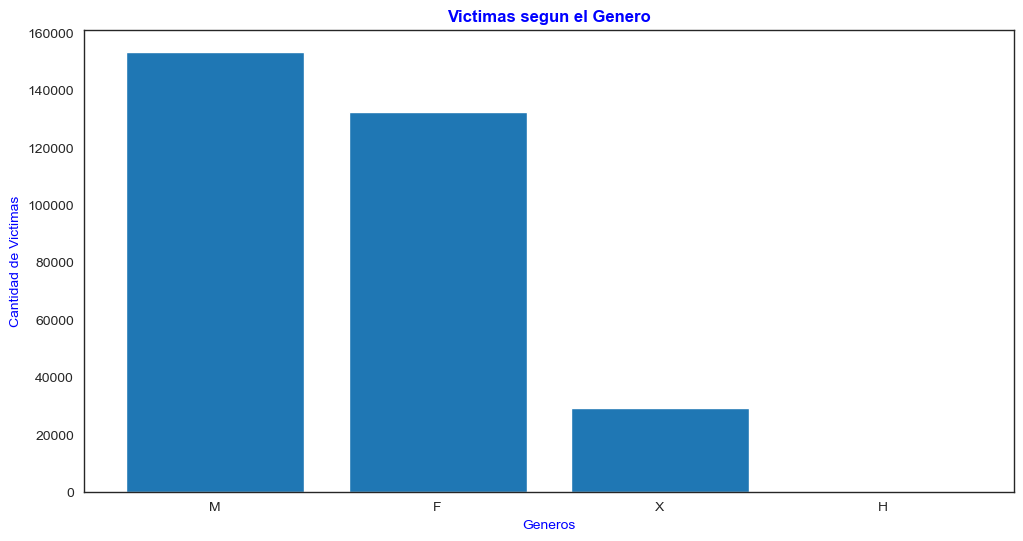

In [80]:
#Segun el genero (vict sex)--> Femenino(F), Masculino(M), No binario(X), Indeterminado/Desconocido(H)-- diagrama de barras

#Realizamos un conteo de generos, siendo un dato cualitativo
conteo_generos = crimenes_final['Sexo Vict'].value_counts()

#Creamos la grafica
fig_generos, ejes = plt.subplots(figsize=(12,6))

#Personalizamos la grafica
ejes.bar(conteo_generos.index, conteo_generos)
ejes.set_title("Victimas segun el Genero")
ejes.set_ylabel("Cantidad de Victimas")
ejes.set_xlabel("Generos")







Se observa que las victimas del género Masculino (y no Femenino como se planteaba) se ve la gran concentracion de victimas

**VICTIMAS SEGUN LA DESCENDECIA**

Text(0.5, 0, 'Tipos de Descendencia')

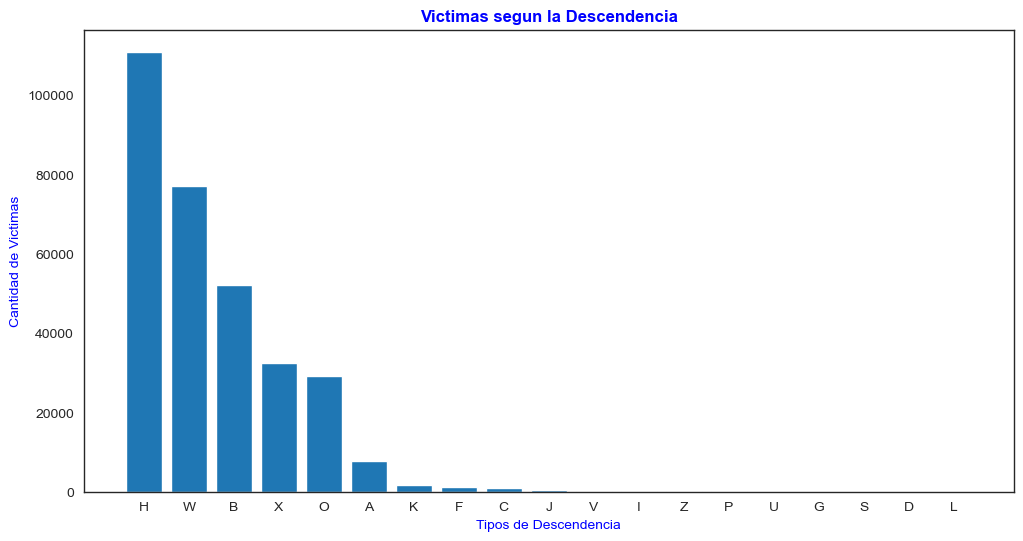

In [81]:
#Segun la descendencia (vict descent)--> A - Otro asiático ; B - Negro ;C - Chino ;D - Camboyano ;F - Filipino ;G - Guameño ;H - Hispano/Latino/Mexicano ;I - Indio americano/Nativo de Alaska ;J - Japonés ;K - Coreano ;
#L - Laosiano ;O - Otro ;P - Isleño del Pacífico ;S - Samoano ;U - Hawaiano ;V - Vietnamita ;W - Blanco ;X - Desconocido ;Z - Indio asiático

#Realizamos un conteo de las descendencias, siendo un dato cualitativo
conteo_descendencia = crimenes_final['Descend Vict'].value_counts()

#Creamos la grafica
fig_descendencia, ejes = plt.subplots(figsize=(12,6))

#Personalizamos la graficqa
ejes.bar(conteo_descendencia.index, conteo_descendencia)
ejes.set_title("Victimas segun la Descendencia")
ejes.set_ylabel("Cantidad de Victimas")
ejes.set_xlabel("Tipos de Descendencia")



Basandonos en la popularidad de los casos siempres observados en las noticias, peliculas, videojuegos de Estados Unidos, la gente Negra siempre es la más afectada, pero esto no es así en Los Angeles, ya que se observa que los Hispano/Latino/Mexicano son los mas afectados.
Las victimas más afectados son los Hipanos.

**Armas MÁS utilizadas en crimenes**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)'),
  Text(1, 0, 'UNKNOWN WEAPON/OTHER WEAPON'),
  Text(2, 0, 'VERBAL THREAT'),
  Text(3, 0, 'HAND GUN'),
  Text(4, 0, 'SEMI-AUTOMATIC PISTOL'),
  Text(5, 0, 'KNIFE WITH BLADE 6INCHES OR LESS'),
  Text(6, 0, 'UNKNOWN FIREARM'),
  Text(7, 0, 'OTHER KNIFE'),
  Text(8, 0, 'VEHICLE'),
  Text(9, 0, 'MACE/PEPPER SPRAY')])

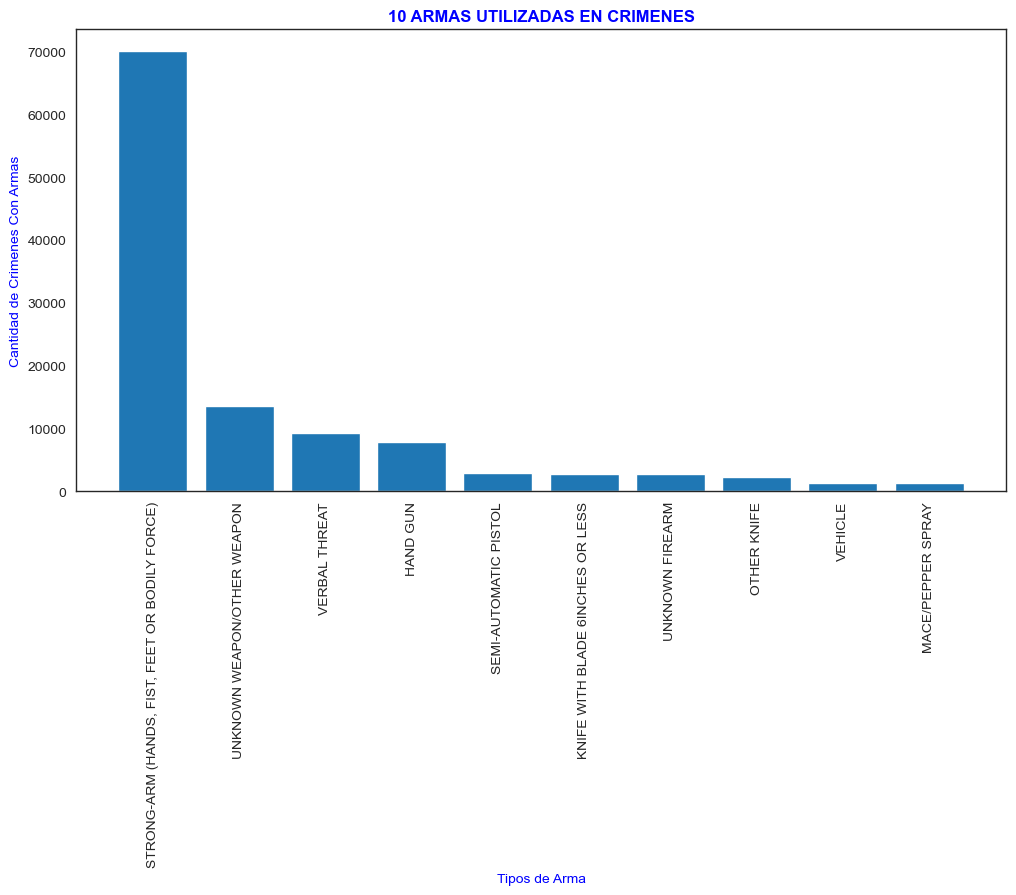

In [82]:
# Como no todos los crimenes del dataframe son a mano armada, se eliminan las filas con NaN, siendo estos los crimenes que NO son a mano armada
crim_mano_armada_sinNan = crimenes_final.dropna(subset=['Cod Arma'])

#Creamos un recuento de las armas, siendo un dato cualitativo
cant_crim_Armas = crim_mano_armada_sinNan['Descrip Arma'].value_counts()

#Como son muchas categorias, hacemos un top 10 para que el grafico sea mas ameno
top_10_armas =cant_crim_Armas.head(10)

#Creamos la grafica
fig_armas, ejes = plt.subplots(figsize=(12,6))
ejes.bar(top_10_armas.index, top_10_armas)

#Personalizamos la grafica
ejes.set_title("10 ARMAS UTILIZADAS EN CRIMENES")
ejes.set_ylabel("Cantidad de Crimenes Con Armas")
ejes.set_xlabel("Tipos de Arma")
plt.xticks(rotation=90)


Se responde a la pregunta de "Cuales son las armas que mas impacto tienen en la actividad criminal en Los Angeles?"y estas son **Las armas cuerpo a cuerpo, ya sea con los puños, patadas o con cualquier parte del cuerpo**

# **VISUALIZACIONES CON SEANBORN** #

**Horarios donde se concentran mas crimenes (formato militar)**

Text(0.5, 1.0, 'Concentracion de Crimenes por Horarios')

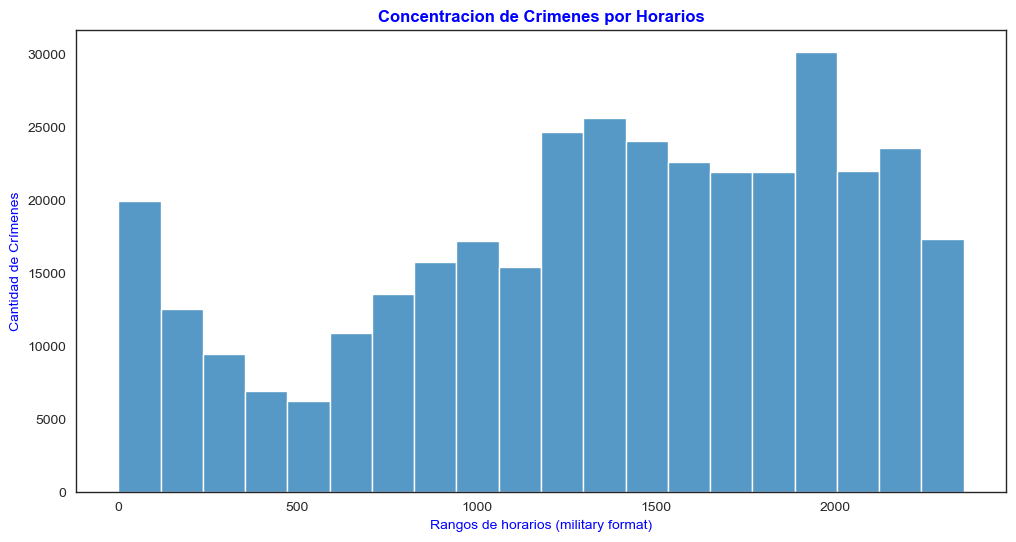

In [83]:
#Como trabajamos con horarios, este es un dato cuantitativo
#Comenzamos eliminando aquellos crimenes en los cuales no se tuvieron en cuenta los horarios (presencia de NaN)
crimenes_sin_horarios_nan =  crimenes_final.dropna(subset=['Hora Crim'])

#Convertimos los horarios que estaban en String a Float
crimenes_sin_horarios_nan.loc[:, 'Hora Crim'] = crimenes_final['Hora Crim'].astype(float)
#crimenes_sin_horarios_nan['TIME OCC'] = crimenes_sin_horarios_nan['TIME OCC'].astype(float) --> otra manera de hacerlo pero a python no le gusta

#Ralizamos la grafica
plt.figure(figsize=(12,6))
sns.histplot(data=crimenes_sin_horarios_nan,x='Hora Crim',bins=20)#.set_title('Concentracion de Crimenes por Horarios')

# Personalizamos la grafica
plt.xlabel('Rangos de horarios (military format)')
plt.ylabel('Cantidad de Crímenes')
plt.title('Concentracion de Crimenes por Horarios')



En el planteo, se preguntaba la mayor concentracion de crimines, la mayoría de estos se dan en la Siesta/Noche, con un pico en el intervalo que incluye las 20hs. (2000 horario militar)

**Tipos de Delitos Cometidos**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'VEHICLE - STOLEN'),
  Text(1, 0, 'BURGLARY FROM VEHICLE'),
  Text(2, 0, 'THEFT OF IDENTITY'),
  Text(3, 0, 'BATTERY - SIMPLE ASSAULT'),
  Text(4, 0, 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT'),
  Text(5, 0, 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)'),
  Text(6, 0, 'BURGLARY'),
  Text(7, 0, 'THEFT PLAIN - PETTY ($950 & UNDER)'),
  Text(8, 0, 'INTIMATE PARTNER - SIMPLE ASSAULT'),
  Text(9, 0, 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)')])

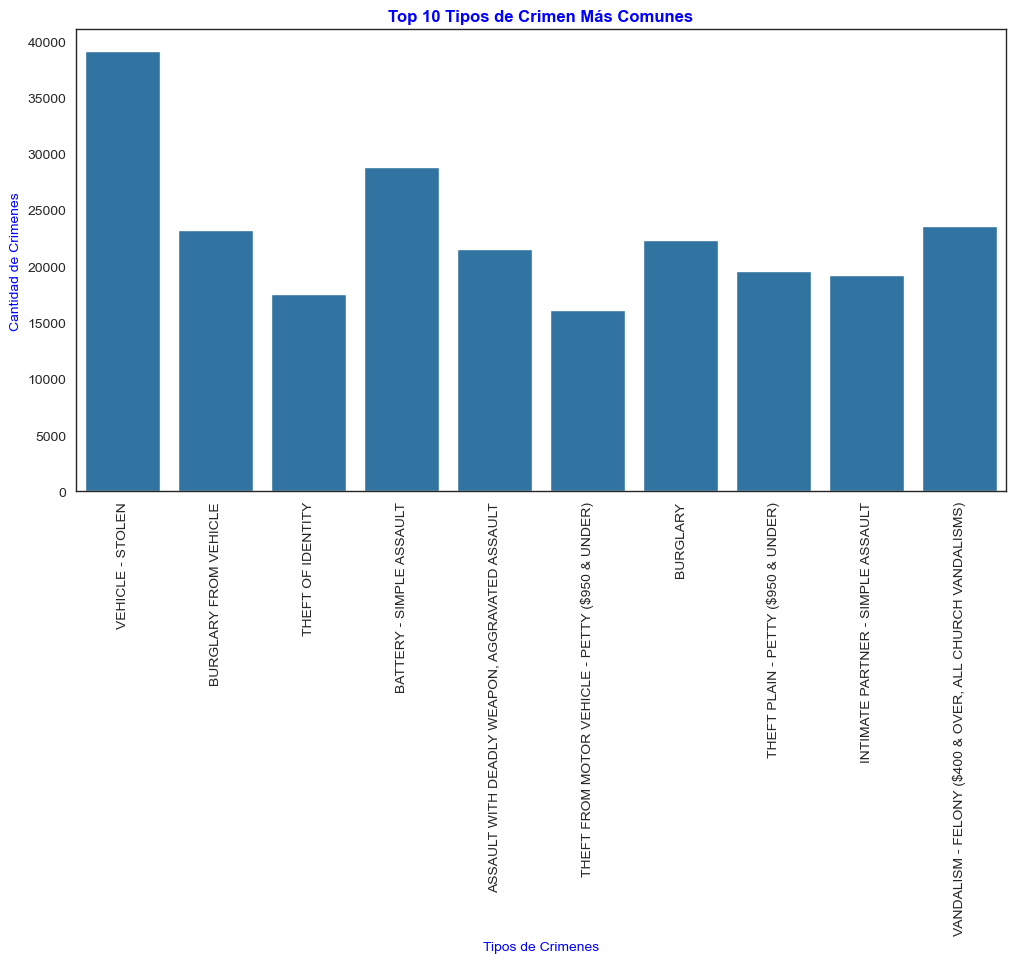

In [84]:
#Comenzamos eliminando la presencia de datos invalidos
tipos_crimenes_sin_nan =  crimenes_final.dropna(subset=['Cod Crim'])

#Como son muchos los tipos de crimines, hago un top 10 de los mismos, siendo estos datos cualitativo
top_10_crimenes = tipos_crimenes_sin_nan['Descrip Crim'].value_counts().head(10)

#Filtramos los crimenes para mantener solo el top 10
df_top_10_crimenes = tipos_crimenes_sin_nan[tipos_crimenes_sin_nan['Descrip Crim'].isin(top_10_crimenes.index)]
df_top_10_crimenes

# Creamos el gráfico de barras
plt.figure(figsize=(12,6))
sns.countplot(x='Descrip Crim', data=df_top_10_crimenes)
# Personalizamos el Grafico
plt.xlabel('Tipos de Crimenes')
plt.ylabel('Cantidad de Crimenes')
plt.title('Top 10 Tipos de Crimen Más Comunes')
plt.xticks(rotation=90)


En el planteo del analisis, se plateaba cuales (cual) eran los crimenes más comunes en Los Angeles, por eso se recurrió a hacer un TOP 10
Siendo así el crimen más realizado es el Robo de Vehiculos.

**Crimenes segun las Edades de la Victimas**

Text(0.5, 1.0, 'Crimenes respecto a Edades de Victimas')

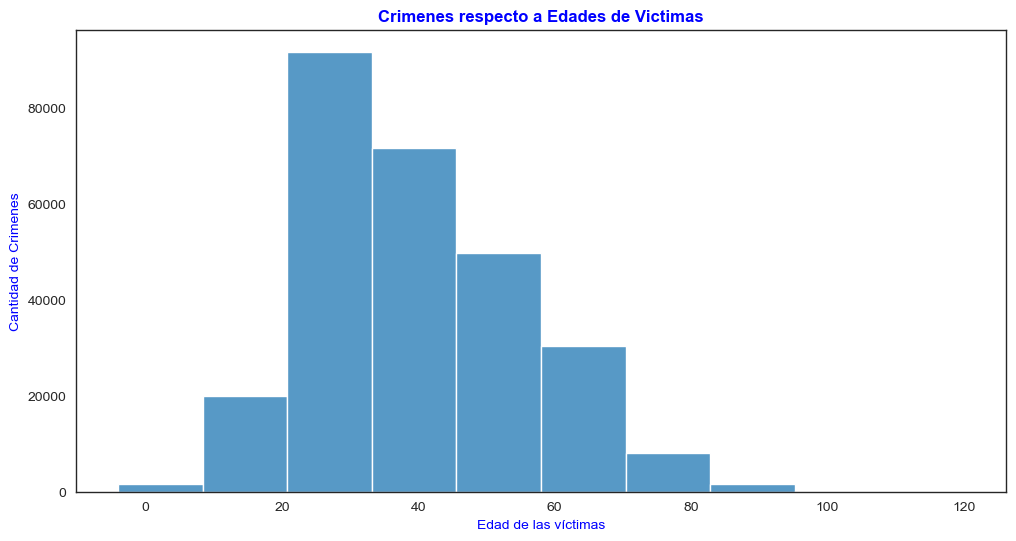

In [85]:
#Trabajamos con las edades de las victimas siendo estos un dato cuantitativo
#Eliminamos aquellos valores que son NaN
edades_victimas = crimenes_final.dropna(subset='Edad Vict')

#Convertimos los valores en float
#edades_victimas['Vict Age'] = pd.to_numeric(edades_victimas['Vict Age'],errors="coerce") --> esta es una forma valida tambien, pero puede producir errores inesperados
edades_victimas.loc[:, 'Edad Vict'] = pd.to_numeric(edades_victimas['Edad Vict'], errors='coerce')

#Ahora eliminamos aquellos valores que son 0.0 (ya que no corresponde a una edad valida)
edades_victimas = edades_victimas[edades_victimas['Edad Vict'] != 0.0]

#Creamos el grafico
plt.figure(figsize=(12,6))
sns.histplot(edades_victimas['Edad Vict'],bins=10)

#Personalizamos el grafico
plt.xlabel('Edad de las víctimas')
plt.ylabel('Cantidad de Crimenes')
plt.title('Crimenes respecto a Edades de Victimas')

Se planteaba cual era la Edad contra la cual se cometían mas atentados (delitos/crimenes), siendo así entre los 20 y 30 años de edad.

Se anexó que esto sucede porque la gente de estas edades son las que más andan en las calles y en horarios en donde se realizan la mayor cantidad de crimenes(20 hs), ya sea por salir de fiesta o por  el simple hecho de andar en la calle.

# **Analisis de Componentes Principales(PCA)**

In [86]:
columnas_crim = list(crimenes_final)[1:]
print(columnas_crim)

['Fecha Crim', 'Sexo Vict', 'Descend Vict', 'Cod Arma', 'Descrip Arma', 'Hora Crim', 'Cod Crim', 'Descrip Crim', 'Edad Vict']


In [87]:
crimenes_final[columnas_crim].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362200 entries, 0 to 362199
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Fecha Crim    362196 non-null  object 
 1   Sexo Vict     314753 non-null  object 
 2   Descend Vict  314748 non-null  object 
 3   Cod Arma      130258 non-null  float64
 4   Descrip Arma  130258 non-null  object 
 5   Hora Crim     362195 non-null  float64
 6   Cod Crim      362195 non-null  float64
 7   Descrip Crim  362195 non-null  object 
 8   Edad Vict     362195 non-null  float64
dtypes: float64(4), object(5)
memory usage: 24.9+ MB


In [88]:
# Defino un Subdataframe para analizar (numericos)
columnas_crim_num = ['Hora Crim', 'Cod Crim', 'Edad Vict']
crimenes_sin_nan_PCA = crimenes_final.dropna(subset=columnas_crim_num)
#Estandarizamos las variables
scaler = StandardScaler()
crimenes_estandarizado = scaler.fit_transform(crimenes_sin_nan_PCA[columnas_crim_num])



In [89]:
crimenes_estandarizado

array([[ 1.20138324,  0.01538577, -1.38523884],
       [ 0.69419919, -0.84203295,  0.78030987],
       [ 0.54050705, -0.12751735, -0.50980425],
       ...,
       [-0.22795364,  0.57270794, -1.0166348 ],
       [-2.04152087, -0.84203295, -0.09512471],
       [ 1.3704446 ,  0.55841763, -0.50980425]])

In [90]:
# Realizamos el PCA a crimenes_estandarizado
pca = PCA()
pca.fit(crimenes_estandarizado)
pca_crimenes = pca.transform(crimenes_estandarizado)

In [91]:
# Vemos cuanta varianza se explica en cada componente
var_explicada = np.round(pca.explained_variance_ratio_*100,2)
var_explicada

array([34.46, 33.29, 32.25])

In [92]:
# Vemos la varianza acumulada
np.cumsum(var_explicada)

array([ 34.46,  67.75, 100.  ])

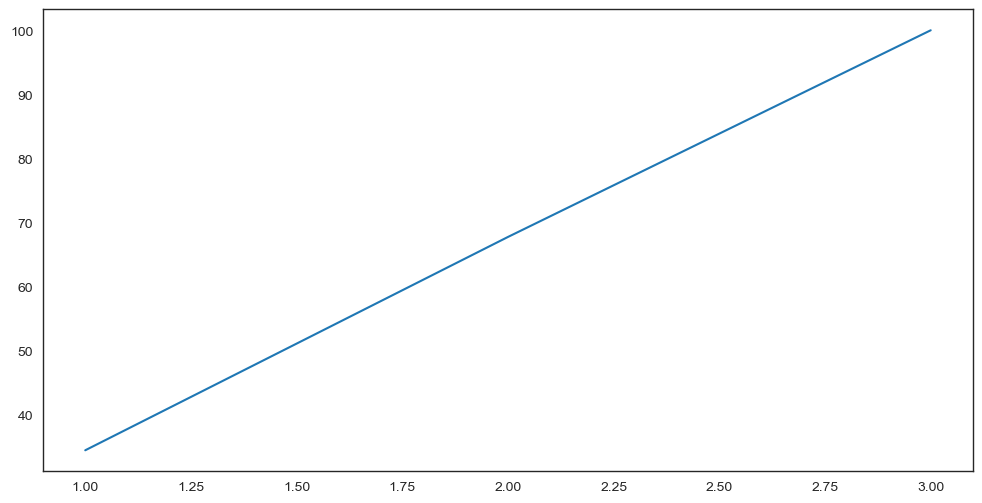

In [93]:
# Graficamos la varianza explicada acumulada
plt.figure(figsize=(12,6))
plt.plot(range(1,len(var_explicada)+1),np.cumsum(var_explicada))

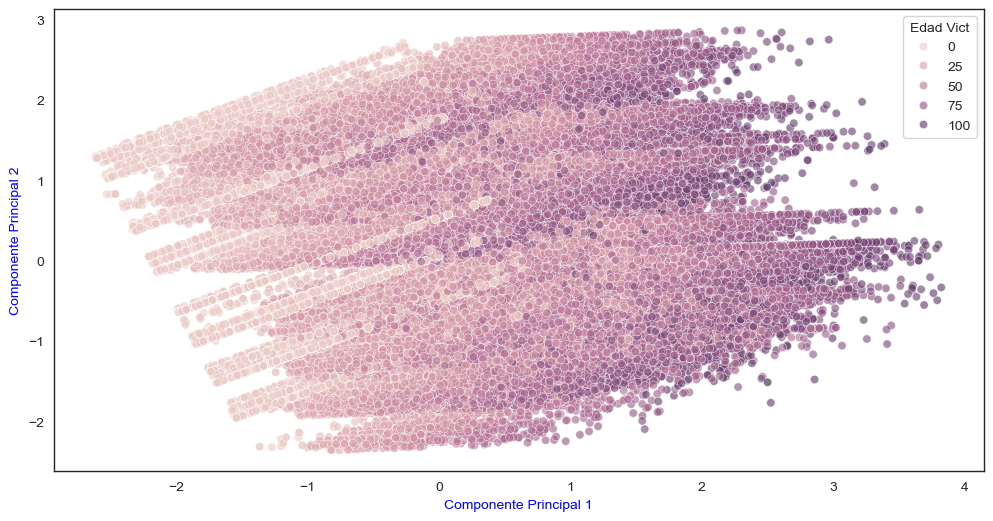

In [94]:
#Ahora realizamos el PC con dos componentes principales
pca2 = PCA(n_components=2)
pca2.fit(crimenes_estandarizado)
pca2_crimenes2 = pca2.transform(crimenes_estandarizado)

#Creamos un nuevo df con los resultados del PCA
df_pca2 = pd.DataFrame(data=pca2_crimenes2, columns=['PC1', 'PC2'])

#Al nuevo Df le agregamos la columna 'Edad Vict'
df_pca2 = pd.concat([df_pca2, crimenes_final[['Edad Vict']]],axis=1)

#Visualizamos los resultados del PCA
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_pca2, x='PC1', y='PC2', hue='Edad Vict', alpha = 0.6)
sns.set_style('whitegrid')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

Como aclaración, la edad '0' contempla los crimenes cometidos contra bebés

# **Eleccion de Algoritmo de Regresión** #

In [67]:
#Una vez con las columnas que nos interesan, vamos a transformarlas de tal forma que podamos hacer un algoritmo de regresion lineal
#para esto vamos a transformar las columnas que son de tipo string a columnas de tipo numerico

# Codificar variables categóricas
label_encoders = {}
for column in ['AREA NAME', 'Crm Cd Desc', 'Vict Sex']:
    label_encoders[column] = LabelEncoder()
    crimenes_mod[column] = label_encoders[column].fit_transform(crimenes_mod[column])

# Vamos a extraer el año, de Time OCC
crimenes_mod['Year'] = pd.to_datetime(crimenes_mod['DATE OCC']).dt.year


X = crimenes_mod[['Crm Cd Desc', 'Year', 'LAT', 'LON', 'Rpt Dist No', 'Vict Age']]
y = crimenes_mod['Vict Sex']
#vamos a cambiar los valores de y a 0 y 1
y = y.replace('M', 0)
y = y.replace('F', 1)


Xcorrelacion = X.corr()
Xcorrelacion

C:\Users\Facu\AppData\Local\Temp\ipykernel_2708\435721499.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crimenes_mod['Year'] = pd.to_datetime(crimenes_mod['DATE OCC']).dt.year


,Crm Cd Desc,Year,LAT,LON,Rpt Dist No,Vict Age
Crm Cd Desc,1.000000,0.014500,-0.002531,0.003190,0.026906,-0.235339
Year,0.014500,1.000000,-0.020423,0.020503,-0.005518,0.000147
LAT,-0.002531,-0.020423,1.000000,-0.999245,0.018429,0.000242
LON,0.003190,0.020503,-0.999245,1.000000,-0.008858,0.000646
Rpt Dist No,0.026906,-0.005518,0.018429,-0.008858,1.000000,0.011490
Vict Age,-0.235339,0.000147,0.000242,0.000646,0.011490,1.000000


In [68]:
#Transformaro las columnas LAT Y LON a enteros para poder hacer el algoritmo de regresion lineal
X['LAT'] = X['LAT'].astype(int)
X['LON'] = X['LON'].astype(int)

X

C:\Users\Facu\AppData\Local\Temp\ipykernel_2708\2990818971.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['LAT'] = X['LAT'].astype(int)
C:\Users\Facu\AppData\Local\Temp\ipykernel_2708\2990818971.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['LON'] = X['LON'].astype(int)


,Crm Cd Desc,Year,LAT,LON,Rpt Dist No,Vict Age
0,4,2020,34,-118,377,36
1,4,2020,34,-118,163,25
2,97,2020,34,-118,155,0
3,127,2020,34,-118,1543,76
4,126,2020,34,-118,1998,31
...,...,...,...,...,...,...
409050,14,2021,33,-118,1431,36
409051,126,2021,33,-118,585,19
409052,129,2021,34,-118,235,0
409053,118,2021,34,-118,363,15


In [69]:
#Una vez cambiamos los valores de las columnas LAT y LON a enteros, vamos a dividir nuestro dataset en dos partes, una para entrenar
#y otra para probar el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Vamos a crear un modelo de regresion lineal
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)


print('Exactitud del modelo:', accuracy)

Exactitud del modelo: 0.6634071212917578


**CONCLUSIÓN**


El análisis tenía como objetivo utilizar datos de crímenes en Los Ángeles para predecir el sexo de las víctimas (masculino o femenino) basado en características del crimen como la descripción del crimen, el año en que ocurrió, la ubicación (latitud y longitud), el distrito de reporte y la edad de la víctima.

Después de preparar los datos y entrenar un modelo de clasificación de bosque aleatorio, el modelo alcanzó una exactitud del 66,35%. Esta medida de rendimiento sugiere que el modelo tiene una capacidad moderada para predecir correctamente el sexo de las víctimas basándose en las características proporcionadas.

Hay una relación discernible entre las características del crimen y el sexo de las víctimas. Sin embargo, este nivel de exactitud también sugiere que el modelo no es completamente preciso y que hay factores adicionales que influyen en el sexo de las víctimas que no se están capturando con las características disponibles en el dataset.